Springboot 里Java代码结构分为三个模块, 

- Controller, 就是你处理对应http request的部分, 经常会用到各种`@GetMapping("/find/temperature")`, `@PostMapping("/add/temperature")`注解, 

- Repository, 是个Interface, 主要声明你在Controller里用来检索数据的方法, 比如`findAllByID()`, `findAllByCreatedDateBetween()`, 很奇怪, 你只用声明这些方法, 不需要定义, 然后在Controller里用个`@Autowired`让Spring自动初始化这个方法所属类的对象即可, 然后就能查找数据了, 咱也不知道Spring怎么实现的, 这几天有考试比较忙, 以后再研究咯

- Entity, 这个就很好理解, 就是ORM, 一个Entity对应一张数据库表

---

## `Controller` Code:
----

```java
// SpringDemoApplication.java
@SpringBootApplication
@RestController
public class SpringDemoApplication {

    public static void main(String[] args) {
        SpringApplication.run(SpringDemoApplication.class, args);
    }

    private TemperatureRepository tempRepository;

    // @Autowired tells Spring to init tempRepository object automatically
    @Autowired
    public void setTempRepository(TemperatureRepository tempRepository) {
        this.tempRepository = tempRepository;
    }

    @PostMapping("/add/temperature")
    public String addTemperature(@RequestParam float value) {
        Temperature temperature = new Temperature();
        temperature.setValue(value);
        tempRepository.save(temperature);
        return "Add a data to repository successfully.";
    }

    @GetMapping("/temperature")
    public Iterable<Temperature> getTemperature() {
        return tempRepository.findAll();
    }

    @GetMapping("/find/temperature/{date}")
    public Iterable<Temperature> findCustomerByCreatedDate(@PathVariable LocalDate date) {
        return tempRepository.findAllByCreatedDateBetween(date.atStartOfDay(),
                date.atTime(23, 59, 59, 999999999));
    }

    @GetMapping("/find/temperature")
    public Iterable<Temperature> findCustomerBetweenDate(@RequestParam LocalDate from, @RequestParam LocalDate to) {
        return tempRepository.findAllByCreatedDateBetween(from.atStartOfDay(),
                to.atTime(23, 59, 59, 999999999));
    }
}
```

## `Repository` Code
---

```java
// TemperatureRepository.java
public interface TemperatureRepository extends CrudRepository<Temperature, Integer> {
    List<Temperature> findAllByCreatedDateBetween(LocalDateTime startTime, LocalDateTime endTime);
}
```

## `Entity` Code
---

```java
// Temperature.java
@Entity
@Table(name = "temperature")
public class Temperature {
    // Cannot use strategy = GenerationType.AUTO, otherwise spring won't find table
    // https://stackoverflow.com/a/49813851/16317008
    @Id
    @GeneratedValue(strategy = GenerationType.IDENTITY)
    private Integer id;
    // field name `value` same as column name in the table,
    // so don't need to add @Column(name = "created_date") annotation
    private float value;
    @Column(name = "created_date")
    @CreationTimestamp
    private LocalDateTime createdDate;

    public Integer getId() {
        return id;
    }

    public void setId(Integer id) {
        this.id = id;
    }

    public float getValue() {
        return value;
    }
    public void setValue(float firstName) {
        this.value = firstName;
    }

    public void setCreatedDate(LocalDateTime createDate) {
        this.createdDate = createDate;
    }

    public LocalDateTime getCreatedDate() {
        return createdDate;
    }
}
```

## File`application.properties`
---

```java
spring.datasource.url=jdbc:mysql://${MYSQL_HOST:localhost}:3306/greenhouse
spring.datasource.username=root
spring.datasource.password=778899
spring.datasource.driver-class-name=com.mysql.cj.jdbc.Driver
```



## File `pom.xml`
----

主要添件mysql connector依赖

```xml
<dependency>
    <groupId>mysql</groupId>
    <artifactId>mysql-connector-java</artifactId>
    <version>8.0.32</version>
</dependency>
```

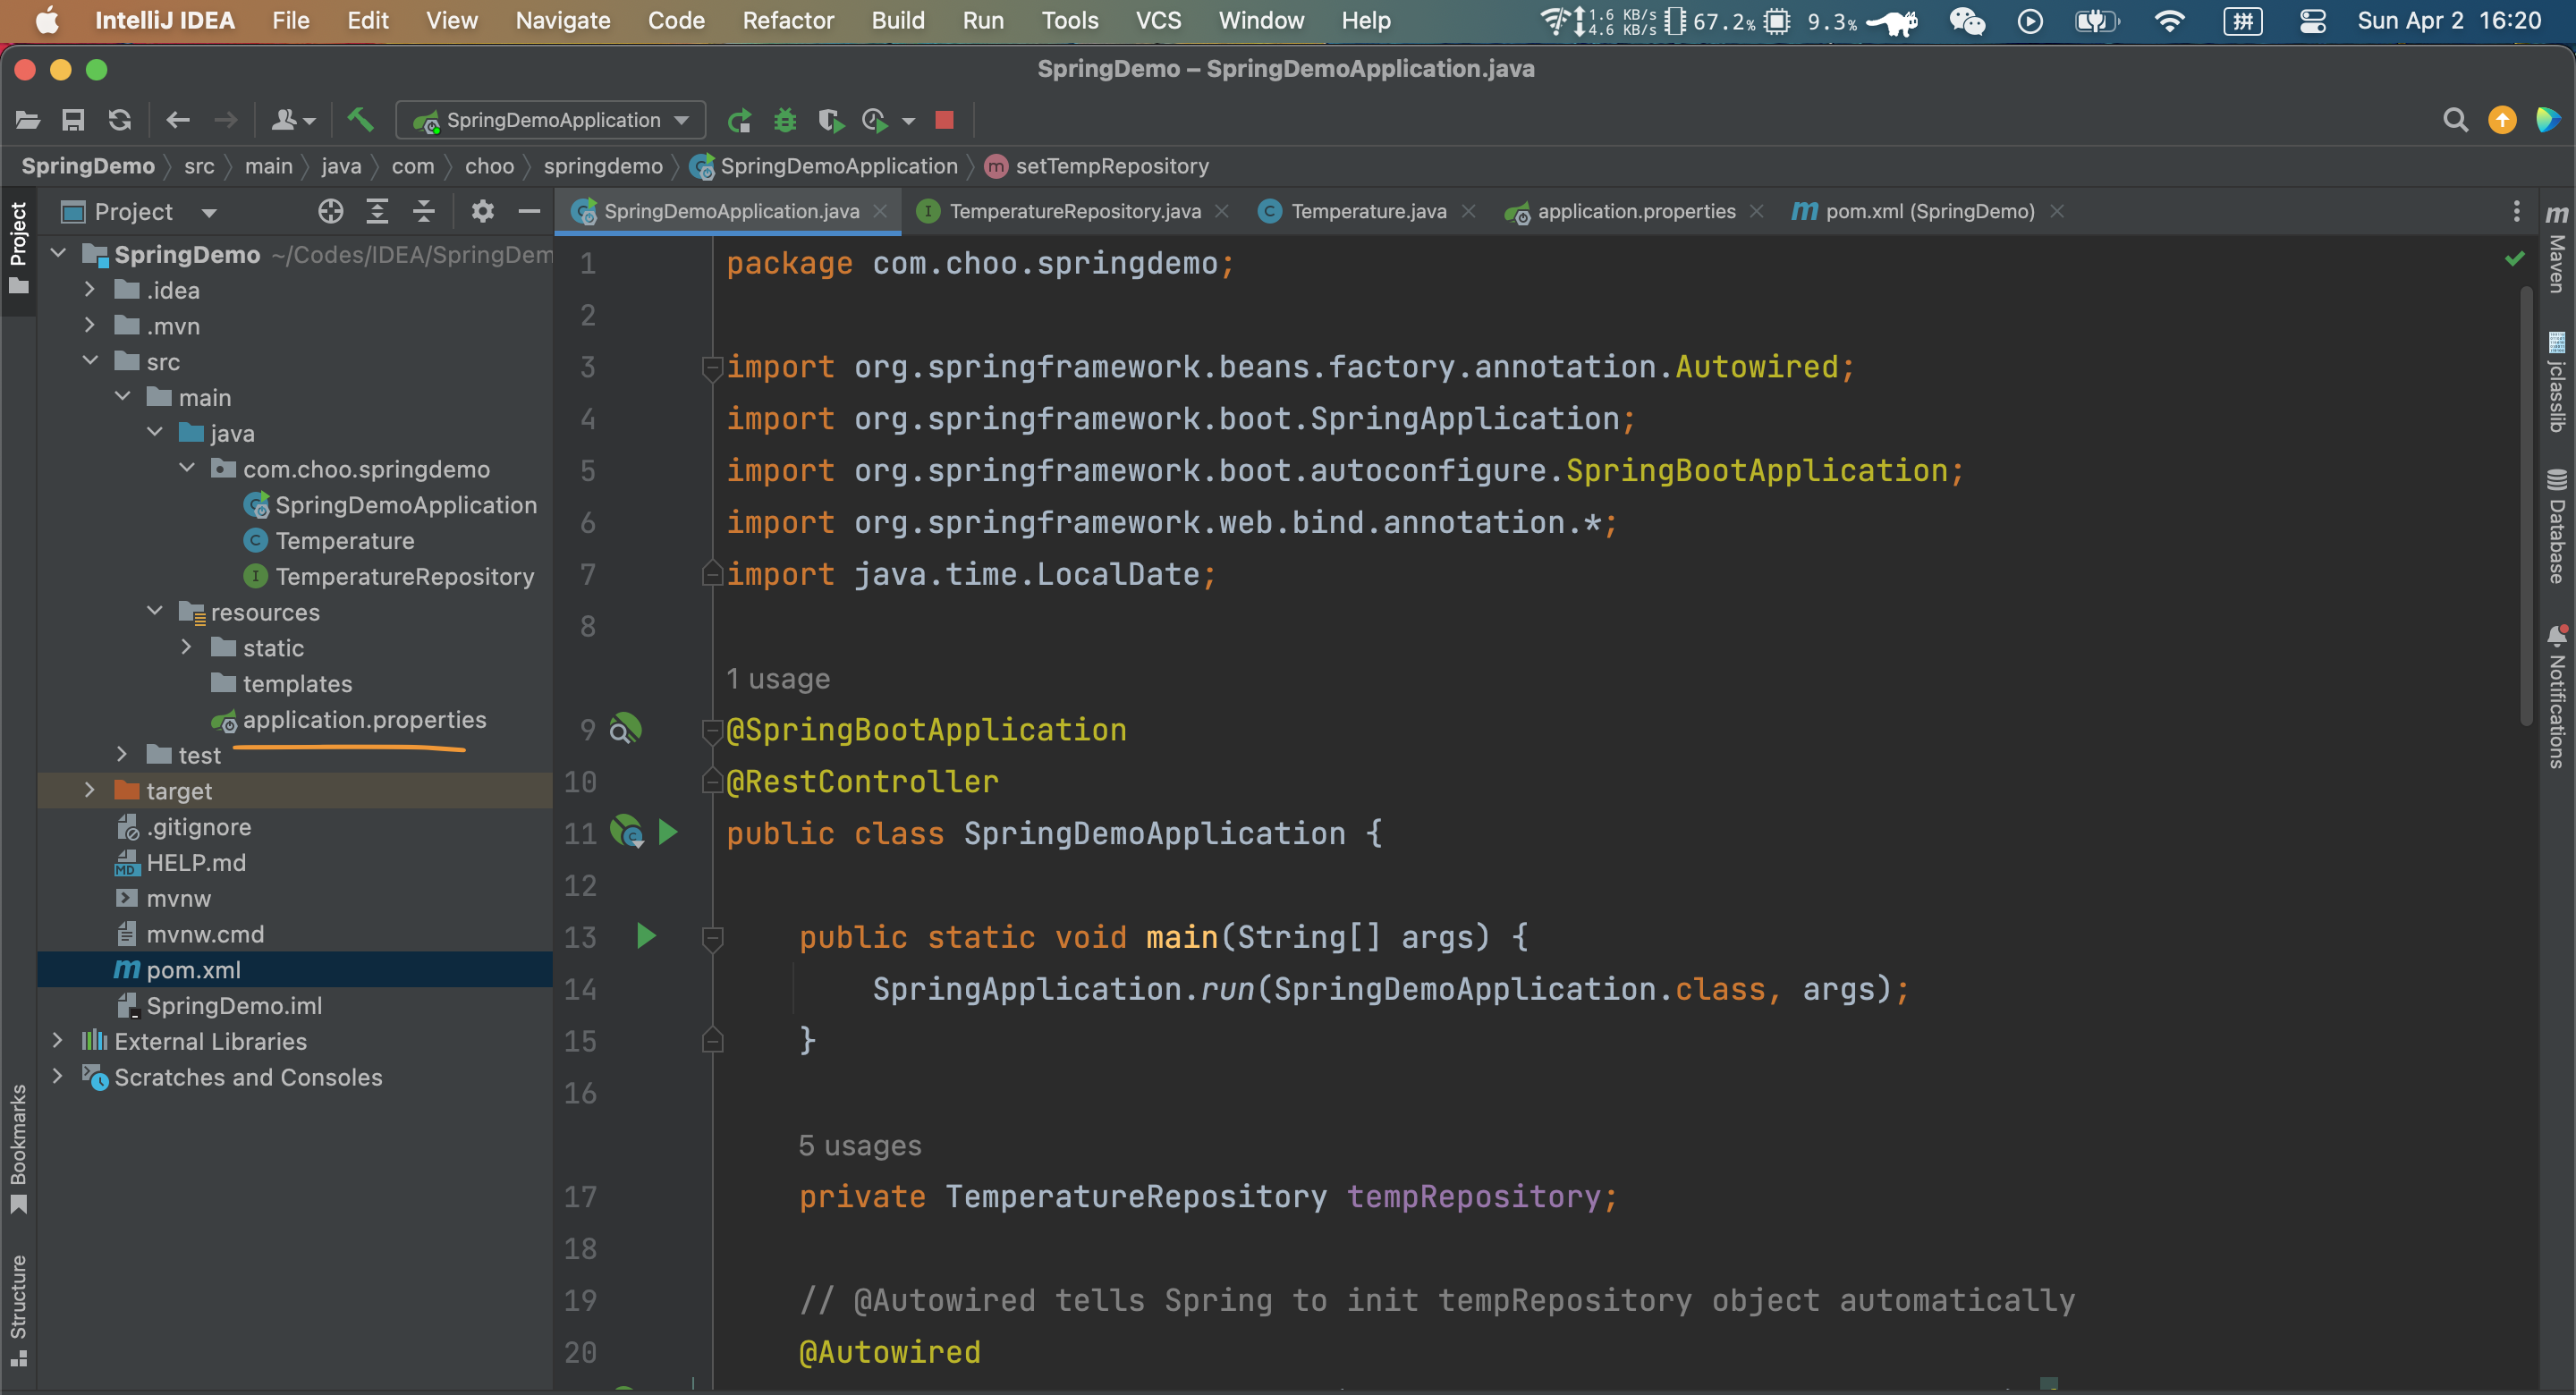

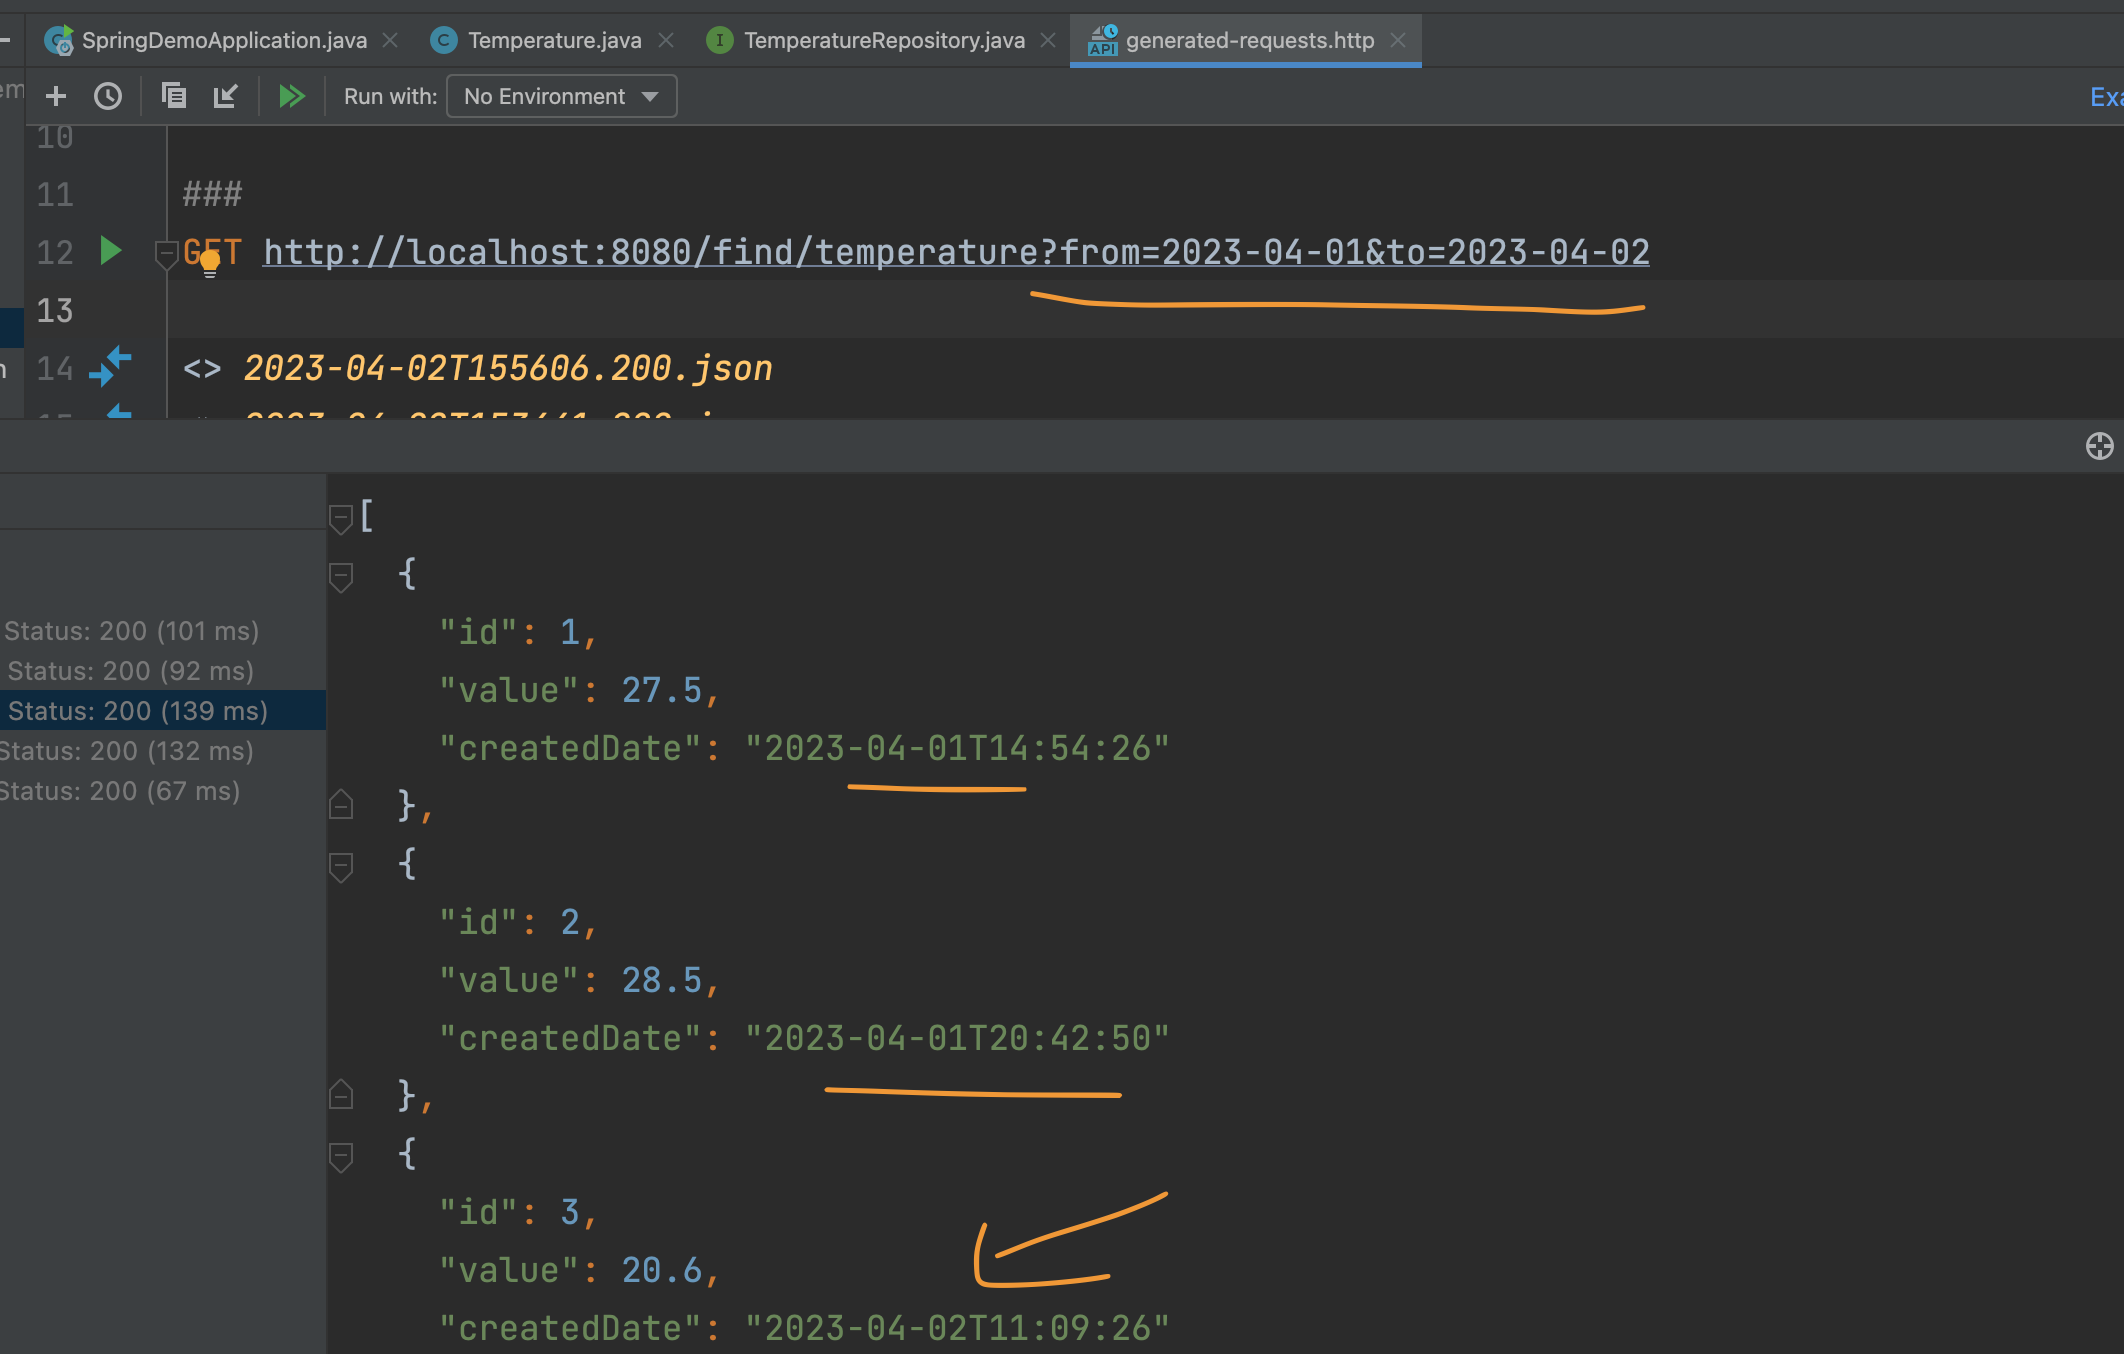